In [1]:
#218670687
#Chakela SM

#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
from keras.layers import Dense,InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Version of pandas:',pd.__version__)

Version of pandas: 1.3.5


In [3]:
data=pd.read_csv('train_XnW6LSF.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8523, 12)

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
data1=data.dropna(axis=0)
type(data1["Outlet_Size"])

pandas.core.series.Series

In [9]:
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
data1["Item_Fat_Content"].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [12]:
data1["Item_Fat_Content"]=data["Item_Fat_Content"].map({"Low fat":1,"Low fat":1,"LF":1,"Regular":2,"reg":2})

In [13]:
data1["Outlet_Location_Type"].value_counts()

Tier 1    1860
Tier 3    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [14]:
data1["Outlet_Location_Type"]=data1["Outlet_Location_Type"].map({"Tier 1":1,"Tier 2":2,"Tier 3":3})

In [15]:
data1["Outlet_Type"].value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [16]:
data1["Outlet_Type"]=data1["Outlet_Type"].map({"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3,"Grocery Store":4})

In [17]:
data1["Outlet_Type"].value_counts()

1    3722
2     928
Name: Outlet_Type, dtype: int64

In [18]:
data1["Outlet_Identifier"].value_counts()

OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
Name: Outlet_Identifier, dtype: int64

In [19]:
data1["Outlet_Identifier"]=data1["Outlet_Identifier"].map({"OUT010":1,"OUT013":2, "OUT017":3, "OUT018":4, "OUT019":5,"OUT027":6,"OUT035":7, "OUT045":8,"OUT046":9, "OUT049":10,  })   

In [20]:
data1["Outlet_Identifier"].value_counts()

2     932
10    930
9     930
7     930
4     928
Name: Outlet_Identifier, dtype: int64

In [21]:
data1["Item_Type"]=data1["Item_Type"].map({"Fruits and Vegetables":1,
                                           "Snack Foods":2,
                                           "Household":3,
                                           "Frozen Foods":4,
                                           "Dairy":5,
                                           "Canned":6,
                                           "Baking Goods":7,
                                          "Health and Hygiene":8,
                                           "Soft Drinks":9,
                                           "Meat":10,
                                           "Breads":11,
                                           "Hard Drinks":12,
                                           "Others":13,
                                           "Starchy Foods":14,
                                           "Breakfast":15,
                                           "Seafood":16})

In [22]:
data1["Item_Type"].value_counts()

1     670
2     656
3     498
4     477
5     380
6     361
7     351
8     277
9     241
10    221
11    132
12    117
13     91
14     87
15     58
16     33
Name: Item_Type, dtype: int64

In [23]:
data1["Outlet_Size"]=data1["Outlet_Size"].map({"Small":1,"Medium":2,"High":3})

In [24]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content             2827
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
data = data.drop(["Item_Identifier"],axis=1)

In [26]:
from sklearn.preprocessing import  Normalizer
from sklearn.utils import shuffle

train=shuffle(data1,random_state=42)

train_X=train.drop(["Item_Outlet_Sales"],axis=1)
train_Y=train["Item_Outlet_Sales"]

In [27]:
train_X=train_X.head(500).to_numpy()
train_Y=train_Y.head(500).to_numpy().reshape(1,-1)

In [28]:
train_Y.shape

(1, 500)

In [29]:
def sigmoid(x):
    return (1/(1+np.exp(-1*x)))

def linear(x,a):
    return a*x

In [30]:
input_layer_neurons=train_X.shape[0]
hidedn_layer_neurons=25
output_layer_neurons=1

w_ih=np.random.uniform(size=(input_layer_neurons,hidedn_layer_neurons))
w_ho=np.random.uniform(size=(hidedn_layer_neurons,output_layer_neurons))
b_ih=np.array([np.random.rand() for i in range(hidedn_layer_neurons)]).reshape(1,-1)

# b_ih=np.array([[1.0,1.5,3.0],[1.0,1.5,3.0],[1.0,1.5,3.0],[1.0,1.5,3.0],[1.0,1.5,3.0],[1.0,1.5,3.0],[1.0,1.5,3.0]])

lr=0.001
epochs=2000

model_error=[]
a=2;

In [31]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

In [32]:
[np.random.rand() for i in range(10)],b_ih

([0.38527658694540956,
  0.19242991162093104,
  0.9375238515804788,
  0.20869100511692618,
  0.06577273582377186,
  0.10008804936313576,
  0.4038358209290709,
  0.9356351976107565,
  0.601029946688264,
  0.016893825133386997],
 array([[0.48211553, 0.91611774, 0.05452364, 0.59896609, 0.82357428,
         0.0449899 , 0.28920257, 0.61179314, 0.2567312 , 0.91021449,
         0.04751815, 0.76451386, 0.45055413, 0.28736011, 0.57654188,
         0.35411234, 0.8099953 , 0.38129469, 0.75523551, 0.7311815 ,
         0.09803171, 0.34052965, 0.96890578, 0.89761412, 0.15945906]]))

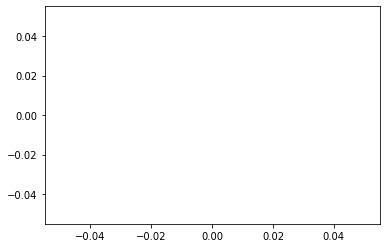

In [33]:
plt.plot([1+i for i in range(len(model_error))],model_error)

In [34]:
w_ih

array([[0.67412668, 0.66451172, 0.56000285, ..., 0.44316776, 0.94953287,
        0.05405921],
       [0.81317876, 0.27605589, 0.45777208, ..., 0.18906462, 0.80751852,
        0.79830402],
       [0.77689571, 0.75762939, 0.47619946, ..., 0.288065  , 0.46289807,
        0.5079226 ],
       ...,
       [0.71855315, 0.01317795, 0.48054463, ..., 0.69488675, 0.10165243,
        0.50571255],
       [0.92544584, 0.62207251, 0.98627798, ..., 0.04566731, 0.01893066,
        0.59064382],
       [0.59020974, 0.62787034, 0.36472207, ..., 0.38271716, 0.79837005,
        0.2059378 ]])

In [36]:
import sklearn

In [37]:
help(sklearn.preprocessing)

Help on package sklearn.preprocessing in sklearn:

NAME
    sklearn.preprocessing

DESCRIPTION
    The :mod:`sklearn.preprocessing` module includes scaling, centering,
    normalization, binarization methods.

PACKAGE CONTENTS
    _csr_polynomial_expansion
    _data
    _discretization
    _encoders
    _function_transformer
    _label
    _polynomial
    setup
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.preprocessing._data.Binarizer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.KernelCenterer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MaxAbsScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.Normalizer(sklearn.b